In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
y_test = np.load('y_test.npy')

In [11]:
baseline_preds = np.load('baseline_preds.npy')
bnn_preds = np.load('bnn_preds.npy')
dropout_preds = np.load('Dropout0.2_preds.npy')
Gaussian_cvae_preds = np.load('Gaucvae_preds.npy')
SBcvae_preds = np.load('SBcvae_preds.npy')
SoftmaxGau_Dircvae_preds = np.load('SoftmaxGau_Dircvae_preds.npy')
Gamma_Dircvae_preds = np.load('gamma_Dircvae_preds.npy')
InvCDF_Gamma_Dircvae_preds = np.load('InvCDF_gamma_Dircvae_preds.npy')

In [12]:
#can make a dictionary, 'model_name':model_preds
pred_dic = {'Baseline':baseline_preds,
            'BNN':bnn_preds,
            'MC_Dropout':dropout_preds,
            'GaussianCVAE':Gaussian_cvae_preds,
            'SBCVAE':SBcvae_preds,
            'SoftmaxGau_DirCVAE':SoftmaxGau_Dircvae_preds,
            'Gamma_DirCVAE':Gamma_Dircvae_preds,
            'InvCDF_Gamma_DirCVAE':InvCDF_Gamma_Dircvae_preds}

# pred_dic = {'Baseline':baseline_preds,
#             'GaussianCVAE':Gaussian_cvae_preds,
#             'SoftmaxGau_DirCVAE':SoftmaxGau_Dircvae_preds,
#             'Gamma_DirCVAE':Gamma_Dircvae_preds,
#             'SBCVAE':SBcvae_preds}

Evaluation metric: How the distribution of the predicted value (1000 * 3750) concentrated around the target value?

Initial Guess: GVAE and GVAE-Softmax can denoisng through setting some decoder weight to zero; SBVAE can dennoisng by setting some latent value to zero; DirVAE hard to denoisng as no way to set latent value/decoder weight to zero.

Also the flexibility of choosing latent value affect the model performance: flexibility GVAE/GVAE-softmax > SBVAE > DirVAE; SBVAE not only can be multi-mode, but also has some flexibility on latent value choosing.

PREDICTION PLOT

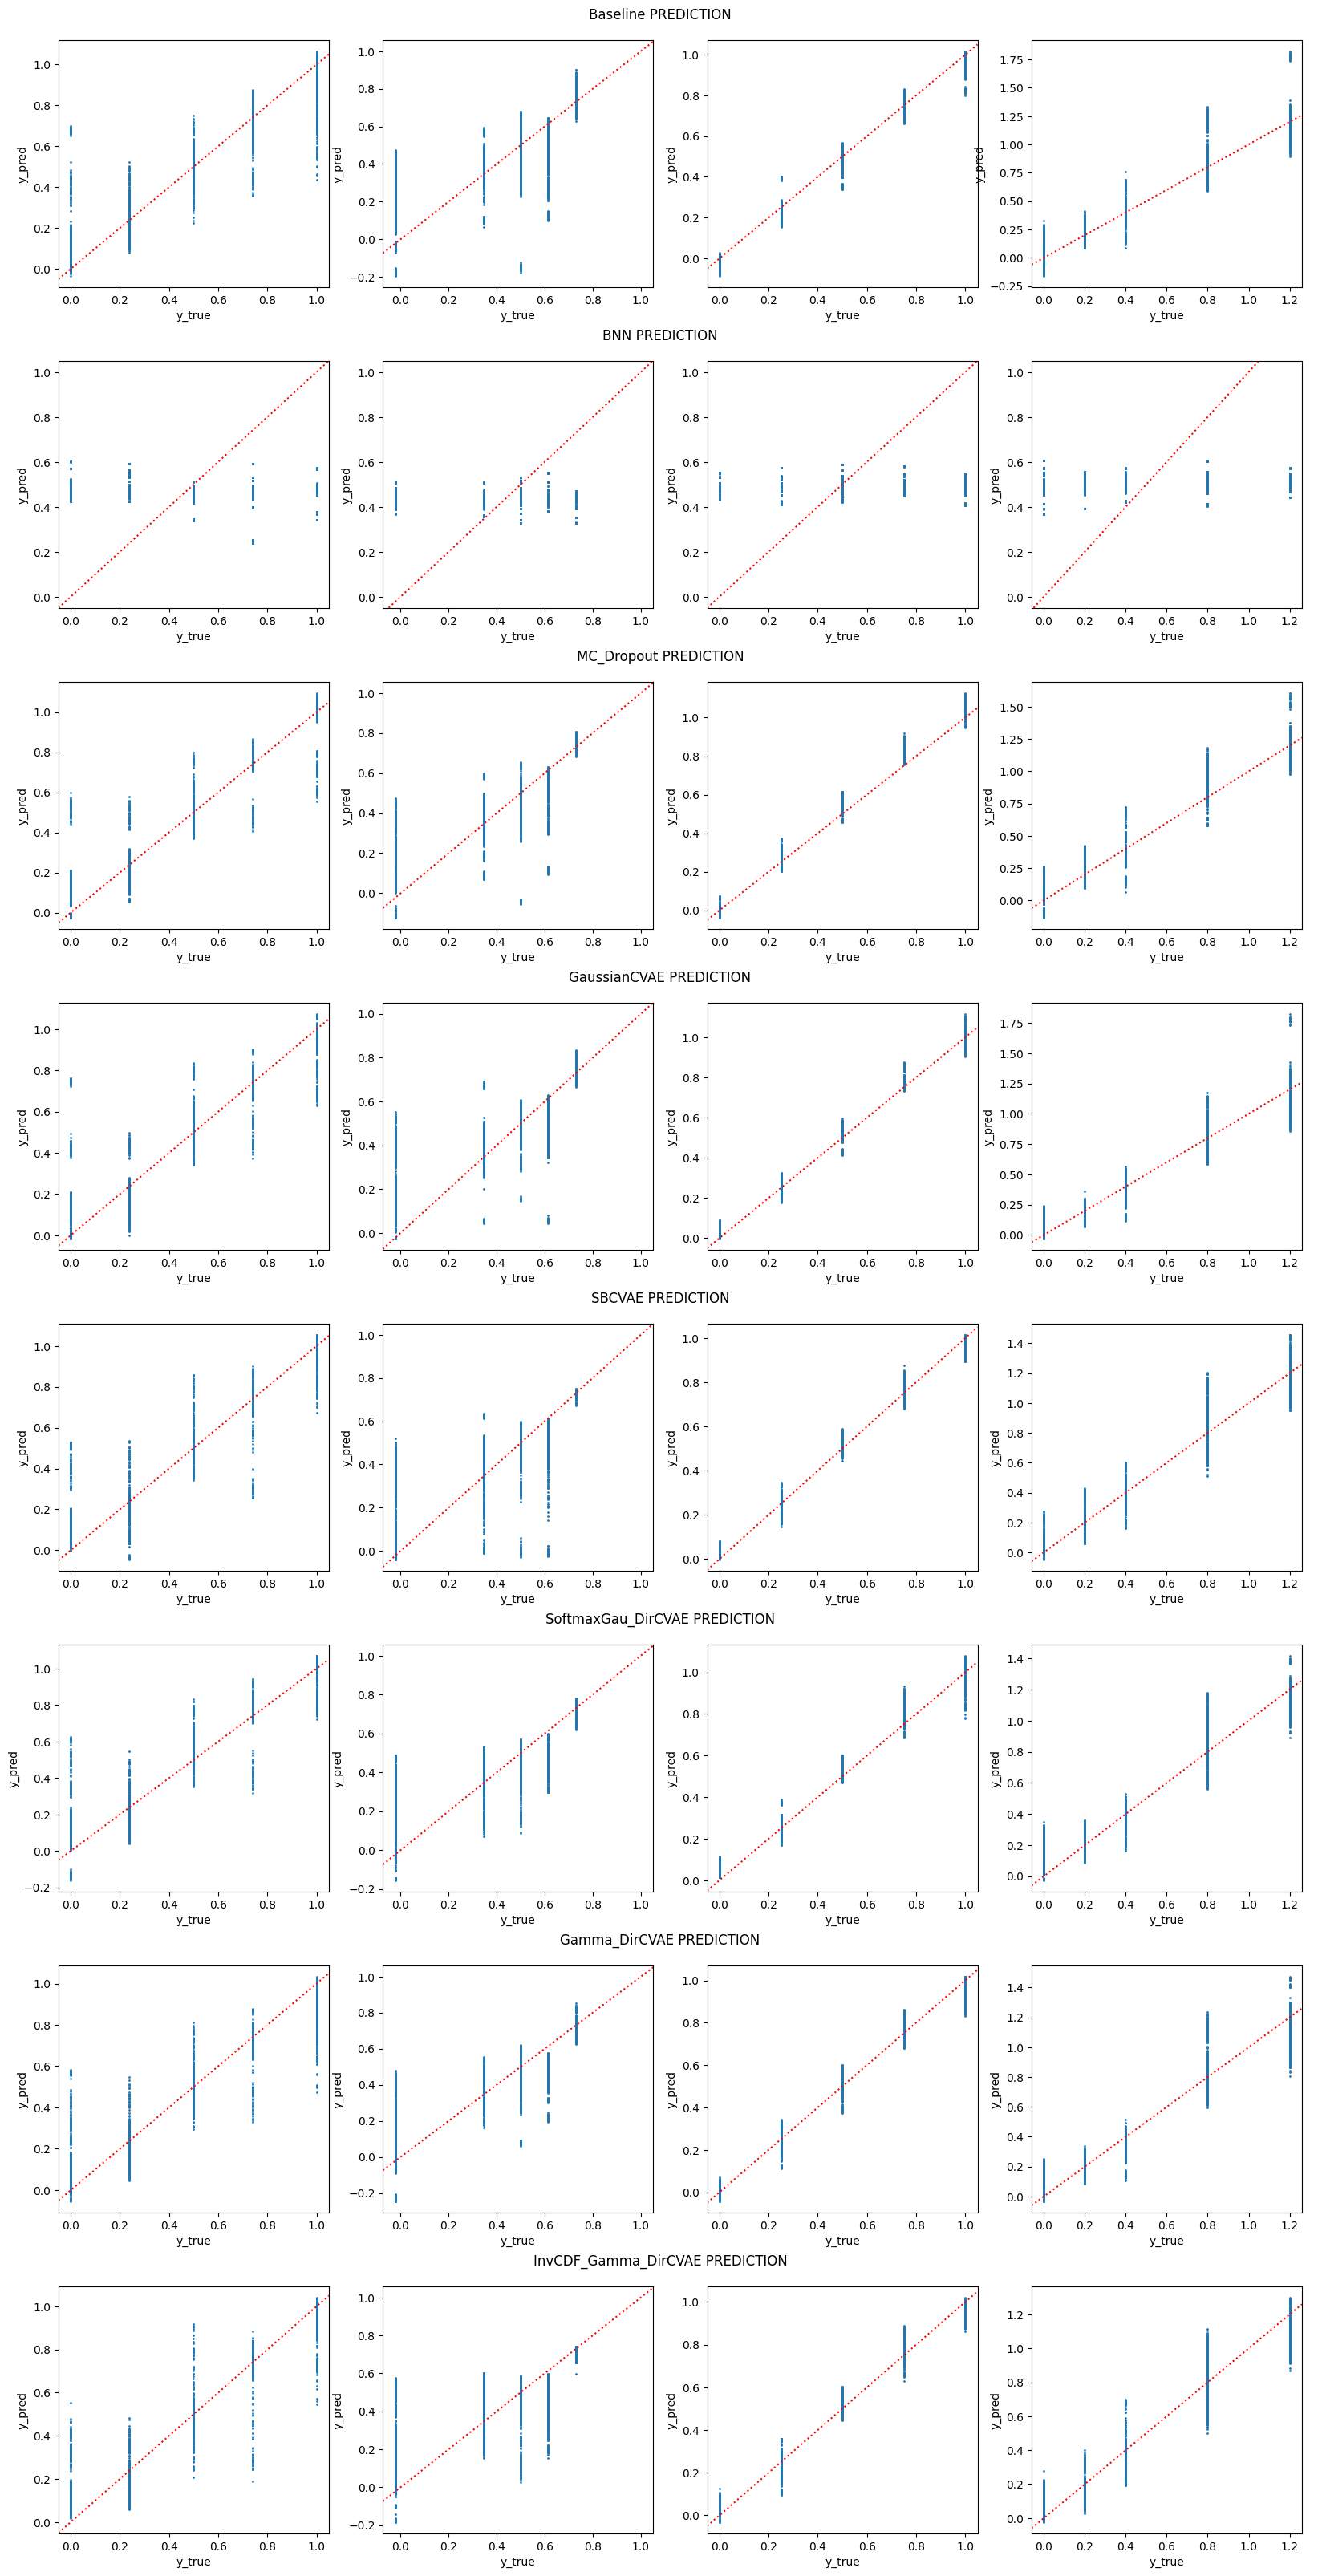

In [13]:
fig, axs = plt.subplots(nrows=len(pred_dic), ncols=1, figsize=(20, 4*len(pred_dic)))
plt.subplots_adjust(hspace=0.5)

# add subfigure per subplot
gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for i, (name, pred) in enumerate(pred_dic.items()):
    subfigs[i].suptitle(f'{name} PREDICTION')
    
    # create 1x4 subplots per subfig
    axs = subfigs[i].subplots(nrows=1, ncols=4)
    
    if len(pred.shape) > 2:
        pred = np.mean(pred, axis=0)
        
    for col, ax in enumerate(axs.ravel()):
        ax.scatter(y_test[:,col], pred[:,col], s=1.0)
        ax.set_xlabel('y_true')
        ax.set_ylabel('y_pred')
        ax.axline([0, 0], [1, 1], linestyle='dotted', color='red')

plt.show()

In [ ]:
# fig, axs = plt.subplots(nrows=len(pred_dic), ncols=1, figsize=(20, 4*len(pred_dic)))
# plt.subplots_adjust(hspace=0.5)

# # add subfigure per subplot
# gridspec = axs[0].get_subplotspec().get_gridspec()
# subfigs = [fig.add_subfigure(gs) for gs in gridspec]

# for i, (name, pred) in enumerate(pred_dic.items()):
#     subfigs[i].suptitle(f'{name} PREDICTION')
    
#     # create 1x4 subplots per subfig
#     axs = subfigs[i].subplots(nrows=1, ncols=4)
    
#     if len(pred.shape) > 2:
#         pred = np.mean(pred, axis=0)
        
#     for col, ax in enumerate(axs.ravel()):
#         y_true = np.unique(y_test[:,col])
#         arr = []
        
# #         colors = ['lightblue', 'steelblue', 'slategrey', 'lightpink', 'rosybrown']
#         colors = ['blue', 'gray', 'orange', 'green', 'red']
#         for value, color in zip(y_true, colors):
#             arr.append(pred[y_test[:,col] == value, col])
#             ax.axhline(y = value, linestyle='dotted', color=color)
        
#         bplot = ax.boxplot(arr, patch_artist=True)
#         ax.set_ylabel('y_pred')

#         for patch, color in zip(bplot['boxes'], colors):
#             patch.set_facecolor(color)

# plt.show()

In [ ]:
# fig, axs = plt.subplots(nrows=len(pred_dic), ncols=1, figsize=(20, 4*len(pred_dic)))
# plt.subplots_adjust(hspace=0.5)

# # add subfigure per subplot
# gridspec = axs[0].get_subplotspec().get_gridspec()
# subfigs = [fig.add_subfigure(gs) for gs in gridspec]

# for i, (name, pred) in enumerate(pred_dic.items()):
#     subfigs[i].suptitle(f'{name} PREDICTION')
    
#     # create 1x4 subplots per subfig
#     axs = subfigs[i].subplots(nrows=1, ncols=4)
    
#     if len(pred.shape) > 2:
#         pred = np.mean(pred, axis=0)
        
#     for col, ax in enumerate(axs.ravel()):
#         y_true = np.unique(y_test[:,col])
#         arr = []
        
#         for value, color in zip(y_true, colors):
#             arr.append(pred[y_test[:,col] == value, col])
#             ax.axhline(y = value, linestyle='dotted', color='red')
            
        
#         bplot = ax.boxplot(arr, labels=y_true)
#         ax.set_xlabel('y_true')
#         ax.set_ylabel('y_pred')

# plt.show()

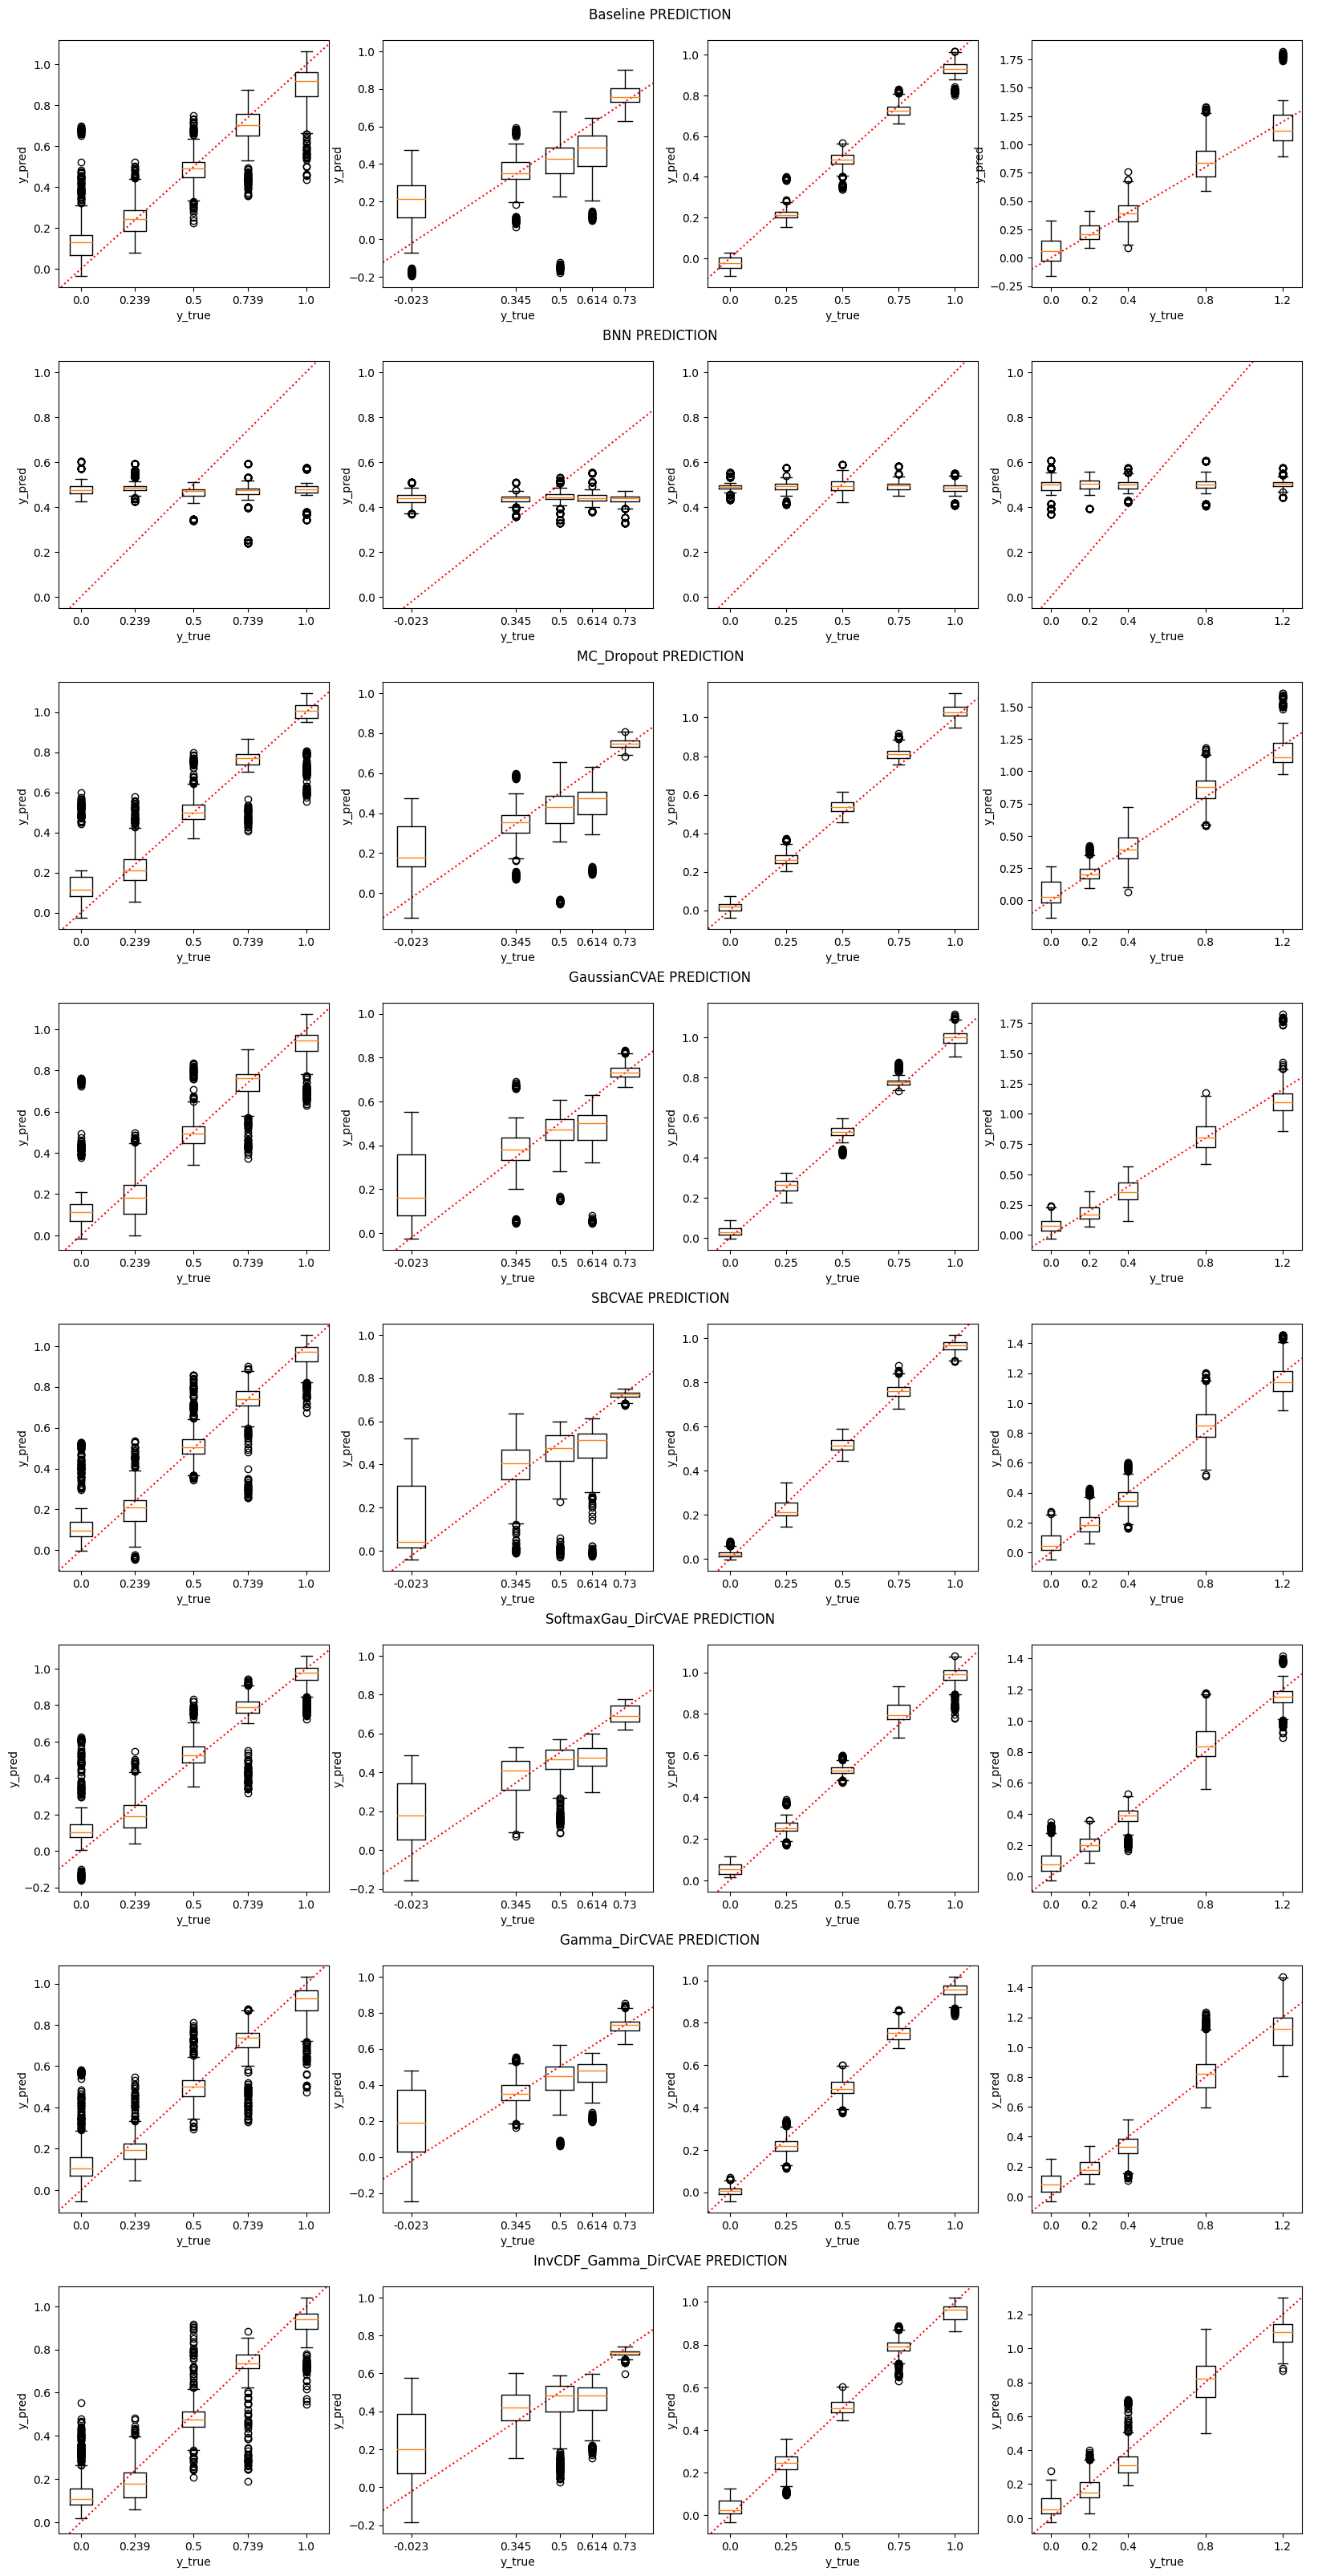

In [14]:
fig, axs = plt.subplots(nrows=len(pred_dic), ncols=1, figsize=(20, 4*len(pred_dic)))
plt.subplots_adjust(hspace=0.5)

# add subfigure per subplot
gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for i, (name, pred) in enumerate(pred_dic.items()):
    subfigs[i].suptitle(f'{name} PREDICTION')
    
    # create 1x4 subplots per subfig
    axs = subfigs[i].subplots(nrows=1, ncols=4)
    
    if len(pred.shape) > 2:
        pred = np.mean(pred, axis=0)
        
    for col, ax in enumerate(axs.ravel()):
        y_true = np.unique(y_test[:,col])
        arr = []
        
        for value in y_true:
            arr.append(pred[y_test[:,col] == value, col])
#             ax.axhline(y = value, linestyle='dotted', color='red')

        ax.axline([0, 0], [1, 1], linestyle='dotted', color='red')
        ax.boxplot(arr, positions = y_true, labels = y_true, widths=0.1)
#         ax.axline([0, 0], [1, 1], linestyle='dotted', color='red')
        ax.set_xlabel('y_true')
        ax.set_ylabel('y_pred')
        ax.set_xlim(min(y_true)-0.1, max(y_true)+0.1)

plt.show()

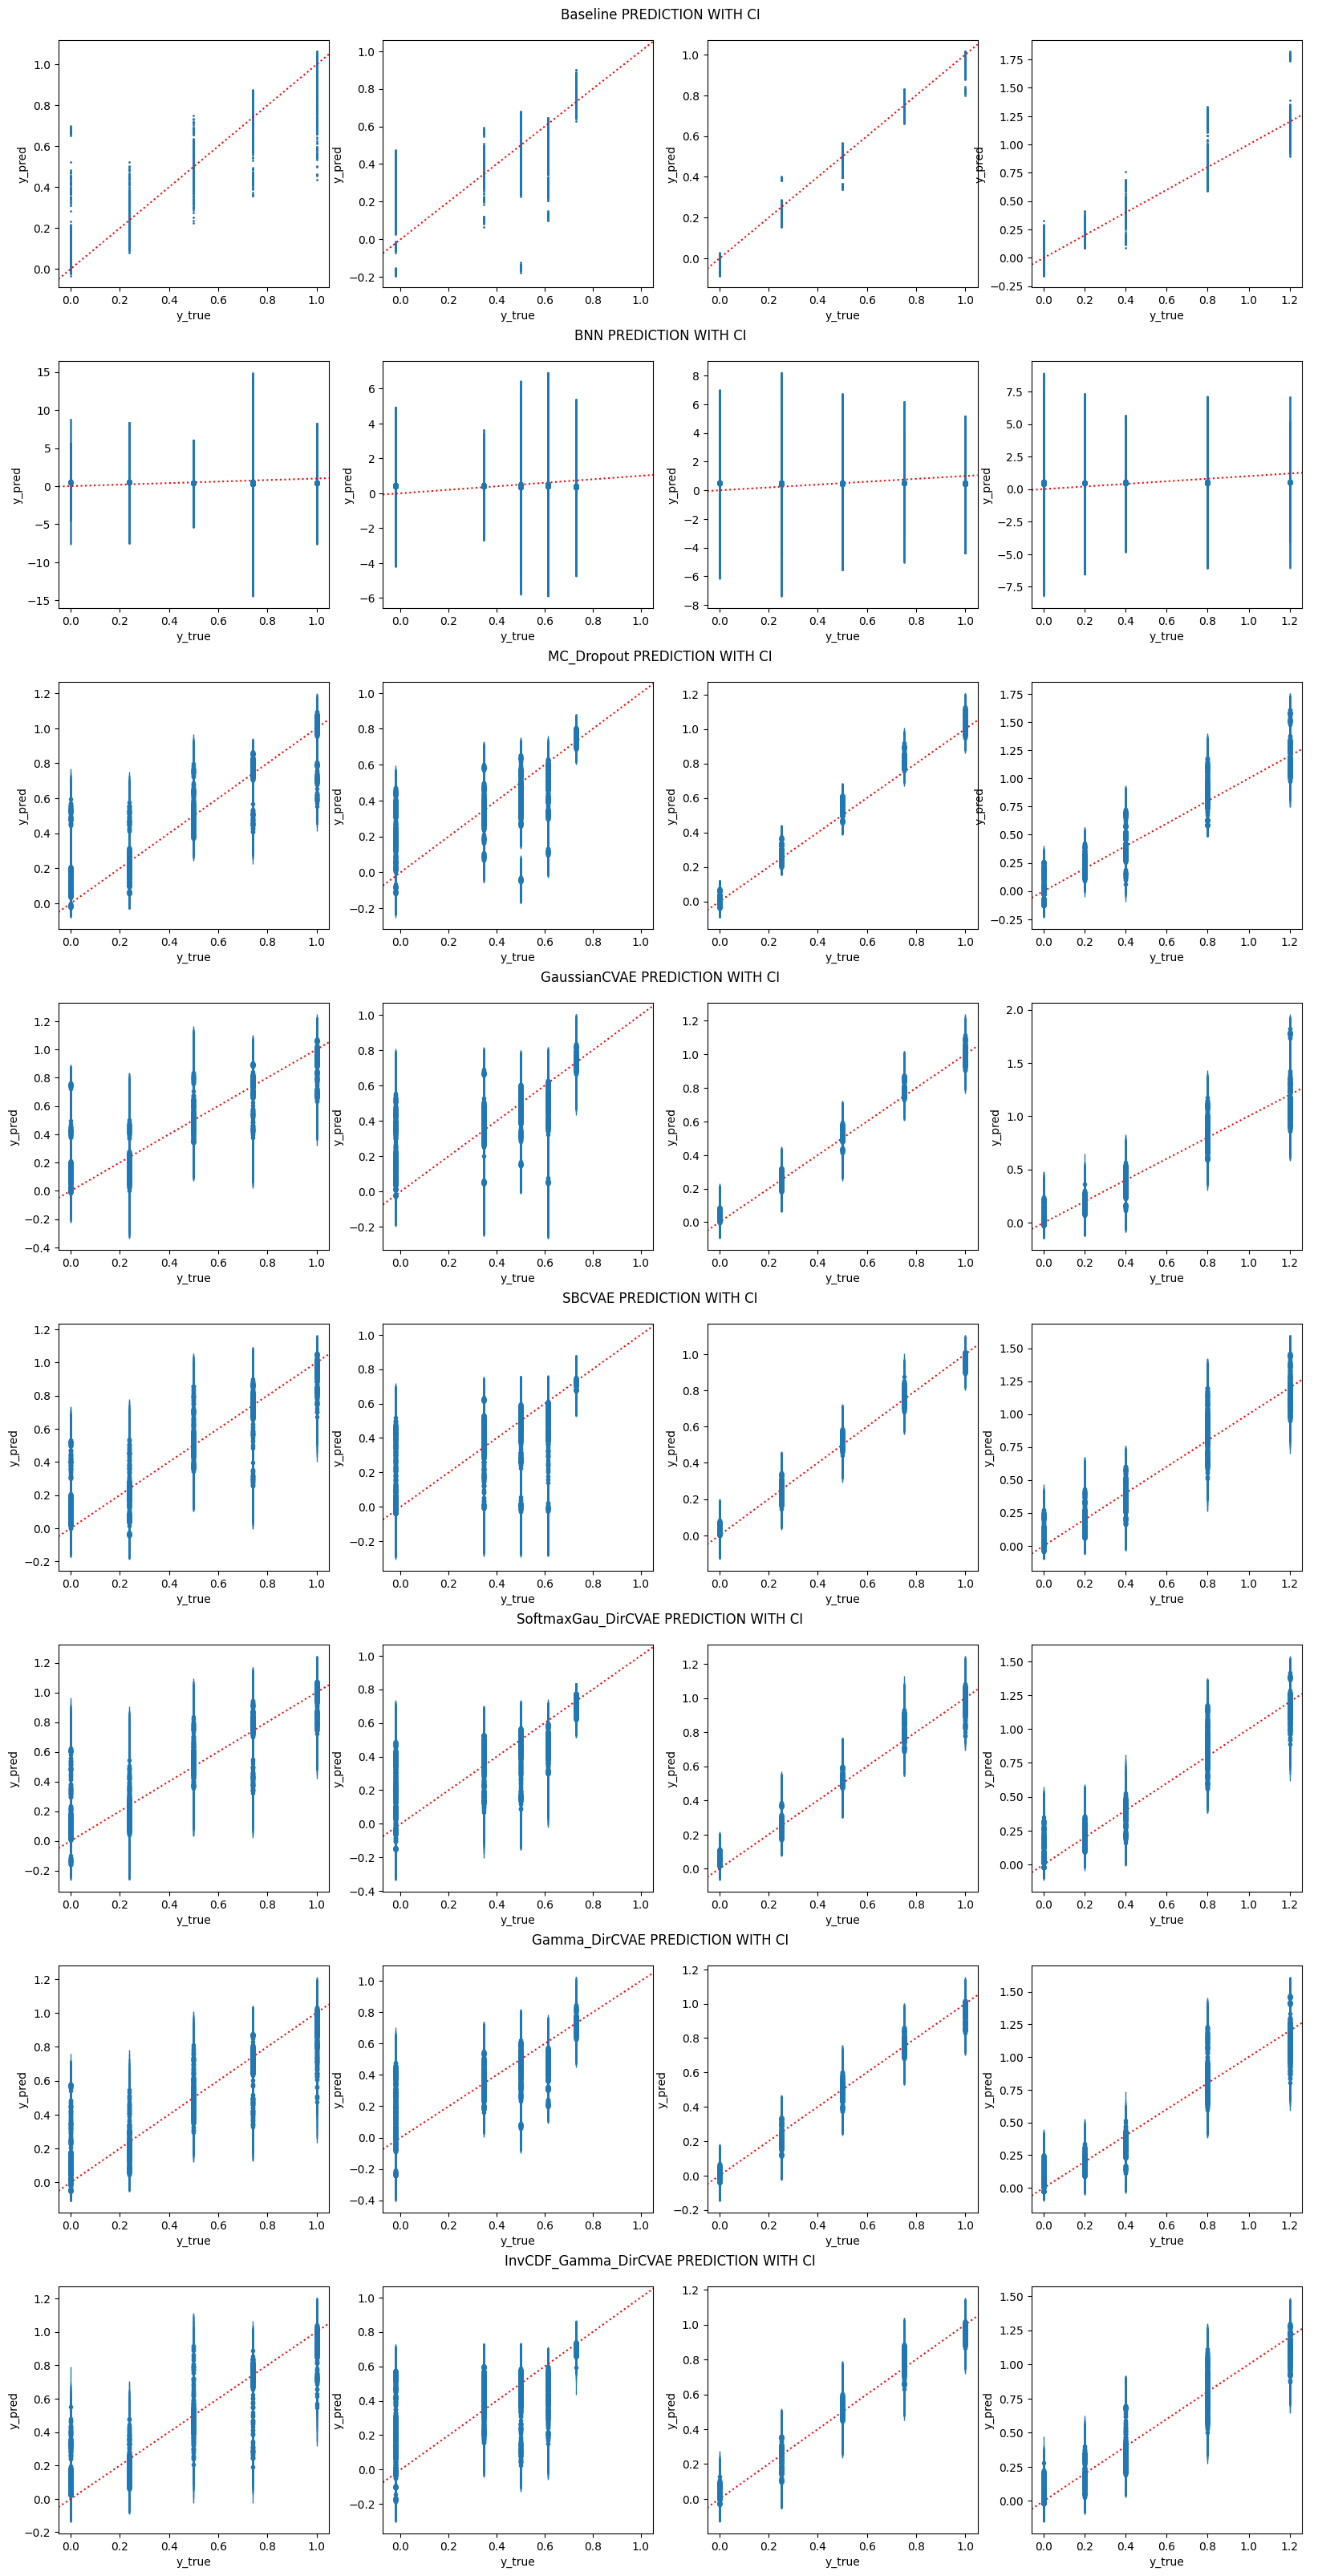

In [15]:
fig, axs = plt.subplots(nrows=len(pred_dic), ncols=1, figsize=(20, 4*len(pred_dic)))
plt.subplots_adjust(hspace=0.5)

# add subfigure per subplot
gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for i, (name, pred) in enumerate(pred_dic.items()):
    subfigs[i].suptitle(f'{name} PREDICTION WITH CI')
    
    # create 1x4 subplots per subfig
    axs = subfigs[i].subplots(nrows=1, ncols=4)
    
    if len(pred.shape) == 2:
        for col, ax in enumerate(axs.ravel()):
            ax.scatter(y_test[:,col], pred[:,col], s=1.0)
            ax.set_xlabel('y_true')
            ax.set_ylabel('y_pred')
            ax.axline([0, 0], [1, 1], linestyle='dotted', color='red')
            
    else:   
        for col, ax in enumerate(axs.ravel()):
            mean = np.mean(pred[:,:,col], axis=0)
            std = np.std(pred[:,:,col], axis=0)
            ci = 1.96 * std
    
            ax.errorbar(y_test[:,col], mean, yerr=ci, fmt='o', markersize=3.0, linewidth=1.0)
            ax.set_xlabel('y_true')
            ax.set_ylabel('y_pred')
            ax.axline([0, 0], [1, 1], linestyle='dotted', color='red')

plt.show()

POINT ESTIMATION

In [16]:
def mse_table(column_name):
    df = pd.DataFrame(index=list(pred_dic.keys()), 
                      columns=column_name,
                      dtype=object)
    
    for i, (name, pred) in enumerate(pred_dic.items()):
        if len(pred.shape) == 2:
            #mean and sd of 3750 testing set mse
            mse_mean = np.square(y_test - pred).mean(axis=0)
            mse_sd = np.square(y_test - pred).std(axis=0)
            df.iloc[i,0:8:2] = mse_mean
            df.iloc[i,1:8:2] = mse_sd
            
            df.iloc[i,8] = np.square(y_test - pred).mean()
            df.iloc[i,9] = np.square(y_test - pred).std()
        else:
            #mean of 1000 trials as point estimation, mean and sd of 3750 testing set mse
            mse_mean = np.square(y_test - np.mean(pred,axis=0)).mean(axis=0)
            mse_sd = np.square(y_test - np.mean(pred,axis=0)).std(axis=0)
            df.iloc[i,0:8:2] = mse_mean
            df.iloc[i,1:8:2] = mse_sd
            
            df.iloc[i,8] = np.square(y_test - np.mean(pred,axis=0)).mean()
            df.iloc[i,9] = np.square(y_test - np.mean(pred,axis=0)).std()
        
#     df.iloc[:,8] = df.iloc[:,0:8:2].mean(axis=1) 
#     df.iloc[:,9] = df.iloc[:,1:8:2].pow(2).mean(axis=1).pow(1/2)
    
    return df

In [17]:
df = mse_table(['param1_mean', 'param1_sd', 'param2_mean', 'param2_sd', 'param3_mean', 'param3_sd', 'param4_mean', 'param4_sd', 'MSEall_mean', 'MSEall_sd'])

In [18]:
df
# df = df.astype(float)
# df.to_csv('./output/mse.csv',float_format='%.4f')

,param1_mean,param1_sd,param2_mean,param2_sd,param3_mean,param3_sd,param4_mean,param4_sd,MSEall_mean,MSEall_sd
Baseline,0.018975,0.051179,0.032599,0.059479,0.003145,0.005084,0.021594,0.050225,0.019078,0.047824
BNN,0.129929,0.111737,0.06902,0.082483,0.126915,0.108968,0.176672,0.167755,0.125634,0.127607
MC_Dropout,0.018321,0.045743,0.030346,0.05331,0.00253,0.003372,0.014643,0.023559,0.01646,0.038388
GaussianCVAE,0.018769,0.056576,0.027542,0.057591,0.001501,0.002057,0.015029,0.033655,0.01571,0.044739
SBCVAE,0.014734,0.036674,0.02823,0.062935,0.001603,0.002027,0.011654,0.018194,0.014055,0.03874
SoftmaxGau_DirCVAE,0.015878,0.043455,0.026606,0.046085,0.002855,0.004857,0.01066,0.020927,0.014,0.034538
Gamma_DirCVAE,0.015872,0.039525,0.028287,0.051328,0.002251,0.003848,0.013271,0.022701,0.01492,0.035601
InvCDF_Gamma_DirCVAE,0.014325,0.031855,0.035881,0.06902,0.002873,0.003902,0.013645,0.016674,0.016681,0.040761


EMPIRICAL COVERAGE

In [19]:
def EC_table(column_name):
    df = pd.DataFrame(index=list(pred_dic.keys()), 
                      columns=column_name,
                      dtype=object)
    
    for i, (name, pred) in enumerate(pred_dic.items()):
        if len(pred.shape) == 2:
            df.iloc[i,0:4] = np.full((4,),np.nan)
        else:
            lower = np.mean(pred, axis=0) - 1.96*np.std(pred, axis=0)
            upper = np.mean(pred, axis=0) + 1.96*np.std(pred, axis=0)
            for j in range(4):
                df.iloc[i,j] = np.sum((y_test[:,j] >= lower[:,j]) & (y_test[:,j] <= upper[:,j]))/y_test.shape[0]
        
    df.iloc[:,4] = df.mean(axis=1)
    
    return df

In [20]:
df = EC_table(['param_1', 'param_2', 'param_3', 'param_4', 'empirical coverage_all'])

/tmp/slurmtmp.26837103/ipykernel_21688/3327547195.py:15: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,4] = df.mean(axis=1)


In [21]:
df
# df = df.astype(float)
# df.to_csv('./output/EC.csv',float_format='%.4f')

,param_1,param_2,param_3,param_4,empirical coverage_all
Baseline,NaN,NaN,NaN,NaN,NaN
BNN,0.944533,0.994133,0.965867,0.889867,0.948600
MC_Dropout,0.629067,0.5752,0.840533,0.768267,0.703267
GaussianCVAE,0.865067,0.852,1.0,0.9208,0.909467
SBCVAE,0.901333,0.850933,0.973333,0.908267,0.908467
SoftmaxGau_DirCVAE,0.891467,0.772267,0.9376,0.8816,0.870733
Gamma_DirCVAE,0.839733,0.7424,0.981867,0.838667,0.850667
InvCDF_Gamma_DirCVAE,0.884,0.747733,0.9968,0.882933,0.877867


AVERAGE LENGTH of CI

In [22]:
def lengthCI_table(column_name):
    df = pd.DataFrame(index=list(pred_dic.keys()), 
                      columns=column_name,
                      dtype=object)
    for i, (name, pred) in enumerate(pred_dic.items()):
        if len(pred.shape) == 2:
            df.iloc[i,:] = np.nan
        else:
            CI_mean = np.mean(2*1.96*np.std(pred, axis=0), axis=0)
            CI_std = np.std(2*1.96*np.std(pred, axis=0), axis=0)
            df.iloc[i,0:8:2] = CI_mean
            df.iloc[i,1:8:2] = CI_std
            
            df.iloc[i,8] = np.mean(2*1.96*np.std(pred, axis=0))
            df.iloc[i,9] = np.std(2*1.96*np.std(pred, axis=0))
    
    
    return df

In [23]:
df = lengthCI_table(['param1_mean', 'param1_sd', 'param2_mean', 'param2_sd', 'param3_mean', 'param3_sd', 'param4_mean', 'param4_sd', 'CIlength_mean', 'CIlength_sd'])

In [24]:
df
# df = df.astype(float)
# df.to_csv('./output/ave_CI_length.csv',float_format='%.4f')

,param1_mean,param1_sd,param2_mean,param2_sd,param3_mean,param3_sd,param4_mean,param4_sd,CIlength_mean,CIlength_sd
Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BNN,3.561453,3.958351,2.980359,2.537835,2.897613,2.421161,3.181237,3.123767,3.155166,3.081871
MC_Dropout,0.178217,0.067516,0.221827,0.037094,0.135039,0.028712,0.264544,0.079998,0.199906,0.074992
GaussianCVAE,0.371053,0.132732,0.391188,0.116903,0.220667,0.040221,0.387971,0.10518,0.34272,0.126551
SBCVAE,0.379758,0.08877,0.382877,0.094453,0.240633,0.040375,0.356847,0.104135,0.340029,0.103504
SoftmaxGau_DirCVAE,0.347891,0.130121,0.337086,0.14002,0.25953,0.075735,0.320482,0.094765,0.316247,0.118241
Gamma_DirCVAE,0.333995,0.07253,0.340371,0.06043,0.273981,0.027678,0.334245,0.097157,0.320648,0.074243
InvCDF_Gamma_DirCVAE,0.35375,0.052013,0.318653,0.081113,0.310057,0.05142,0.370277,0.080455,0.338185,0.072192
